## 데이터셋 준비하기

In [ ]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)

## 모델 구성하기 - Conv1D

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

model = Sequential()
# 이 층은 모델의 제일 첫 번째 층으로만 사용할 수 있습니다.
# Flatten 층을 사용하기 위해 input_length를 전달합니다.
model.add(Embedding(input_dim = num_words, output_dim = 32, input_length = max_len))
model.add(Conv1D(32, 7, activation = 'relu'))
model.add(MaxPooling1D(7))
model.add(Conv1D(32, 5, activation = 'relu'))
model.add(MaxPooling1D(5))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

## 모델 학습시키기

In [ ]:
history = model.fit(pad_X_train, y_train, 
                    batch_size = 32, epochs = 30, 
                    validation_split = 0.2)

## 결과 그리기

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

## 모델 구성하기 - Conv1D + LSTM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2020)

time = np.arange(30 * 12 + 1)
month_time = (time % 30) / 30
time_series = 20 * np.where(month_time < 0.5, 
                          np.cos(2 * np.pi * month_time),
                          np.cos(2 * np.pi * month_time) + np.random.random(361))

def make_sequence(time_series, n):
    x_train, y_train = list(), list()
    
    for i in range(len(time_series)):
        x = time_series[i:(i + n)]
        if (i + n) < len(time_series):
            x_train.append(x)
            y_train.append(time_series[i + n])
        else:
            break
            
    return np.array(x_train), np.array(y_train)

n = 10
x_train, y_train = make_sequence(time_series, n)

x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)

from sklearn.model_selection import train_test_split

patial_x_train = x_train[:30 * 11]
patial_y_train = y_train[:30 * 11]
x_test = x_train[30 * 11:]
y_test = y_train[30 * 11:]

print('train:', patial_x_train.shape, patial_y_train.shape) 
print('test:',x_test.shape, y_test.shape)

train: (330, 10, 1) (330, 1)
test: (21, 10, 1) (21, 1)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Conv1D(32, 3, activation = 'relu', input_shape = (10, 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 3, activation = 'relu'))
# LSTM을 혼합하여 모델을 구성합니다.
model.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1))

model.compile(optimizer='adam',
             loss = 'mse',
             metrics = ['mse'])

# 학습을 진행합니다.
model.fit(x_train, y_train, epochs = 200, batch_size = 32)

pred = model.predict(x_test)

Train on 351 samples
Epoch 1/200
351/351 [==============================] - 2s 6ms/sample - loss: 238.0747 - mse: 238.0747
Epoch 2/200
351/351 [==============================] - 0s 330us/sample - loss: 215.8378 - mse: 215.8378
Epoch 3/200
351/351 [==============================] - 0s 321us/sample - loss: 195.2474 - mse: 195.2474
Epoch 4/200
351/351 [==============================] - 0s 332us/sample - loss: 175.0841 - mse: 175.0841
Epoch 5/200
351/351 [==============================] - 0s 338us/sample - loss: 156.7391 - mse: 156.7391
Epoch 6/200
351/351 [==============================] - 0s 315us/sample - loss: 140.0747 - mse: 140.0747
Epoch 7/200
351/351 [==============================] - 0s 290us/sample - loss: 129.8110 - mse: 129.8110
Epoch 8/200
351/351 [==============================] - 0s 284us/sample - loss: 119.0505 - mse: 119.0505
Epoch 9/200
351/351 [==============================] - 0s 284us/sample - loss: 110.9869 - mse: 110.9869
Epoch 10/200
351/351 [=======================

351/351 [==============================] - 0s 332us/sample - loss: 25.0707 - mse: 25.0707
Epoch 81/200
351/351 [==============================] - 0s 310us/sample - loss: 24.6550 - mse: 24.6550
Epoch 82/200
351/351 [==============================] - 0s 273us/sample - loss: 23.3765 - mse: 23.3765
Epoch 83/200
351/351 [==============================] - 0s 324us/sample - loss: 23.3595 - mse: 23.3595
Epoch 84/200
351/351 [==============================] - 0s 301us/sample - loss: 23.3388 - mse: 23.3388
Epoch 85/200
351/351 [==============================] - 0s 318us/sample - loss: 24.0558 - mse: 24.0558
Epoch 86/200
351/351 [==============================] - 0s 293us/sample - loss: 23.5682 - mse: 23.5682
Epoch 87/200
351/351 [==============================] - 0s 298us/sample - loss: 22.7776 - mse: 22.7776
Epoch 88/200
351/351 [==============================] - 0s 290us/sample - loss: 22.4001 - mse: 22.4001
Epoch 89/200
351/351 [==============================] - 0s 313us/sample - loss: 23.806

351/351 [==============================] - 0s 301us/sample - loss: 17.2481 - mse: 17.2481
Epoch 160/200
351/351 [==============================] - 0s 276us/sample - loss: 17.0584 - mse: 17.0584
Epoch 161/200
351/351 [==============================] - 0s 276us/sample - loss: 15.7892 - mse: 15.7892
Epoch 162/200
351/351 [==============================] - 0s 276us/sample - loss: 16.8024 - mse: 16.8024
Epoch 163/200
351/351 [==============================] - 0s 301us/sample - loss: 16.4717 - mse: 16.4717
Epoch 164/200
351/351 [==============================] - 0s 313us/sample - loss: 16.1349 - mse: 16.1349
Epoch 165/200
351/351 [==============================] - 0s 284us/sample - loss: 17.1155 - mse: 17.1155
Epoch 166/200
351/351 [==============================] - 0s 281us/sample - loss: 16.5468 - mse: 16.5468
Epoch 167/200
351/351 [==============================] - 0s 307us/sample - loss: 15.9946 - mse: 15.9946
Epoch 168/200
351/351 [==============================] - 0s 290us/sample - los

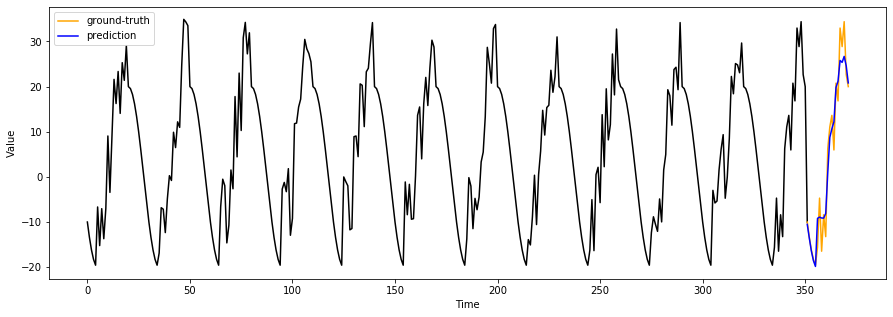

In [36]:
# 결괏값을 그립니다
train_range = np.arange(len(x_train) + 1)
pred_range = np.arange(len(y_train), len(y_train) + len(pred))

plt.figure(figsize=(15,5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(train_range, np.append(y_train, y_test[0]), color = 'black')
plt.plot(pred_range, y_test, color='orange', label='ground-truth')
plt.plot(pred_range, pred, color='blue', label='prediction')
plt.legend()
plt.show()